In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Lendo a base de dados e elaborando os testes

In [3]:
path = "../Atividades/Atividade 9/weatherHistory.csv"
df = pd.read_csv(path)
df = df.set_index("Formatted Date")
df = df.drop(['Daily Summary'],axis=1)
df["Summary"] = df["Summary"].astype('category').cat.codes
df = df[df["Precip Type"].notna()]
df["Precip Type"] =  df["Precip Type"].astype('category').cat.codes

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
2016-09-09 20:00:00.000 +0200,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
2016-09-09 21:00:00.000 +0200,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66


<h2> Utilize o K-means para separar os dados em grupos distintos, desconsiderando o tipo de
precipitação

In [5]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

In [34]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(df[['Temperature (C)',u'Humidity',u'Wind Speed (km/h)',u'Apparent Temperature (C)']])


KMeans(n_clusters=2)

<h2> Veja se é possível associar cada grupo gerado pelo K-means a um tipo de precipitação diferente,
olhando para o tipo de precipitação real.

Text(0, 0.5, 'Humidity')

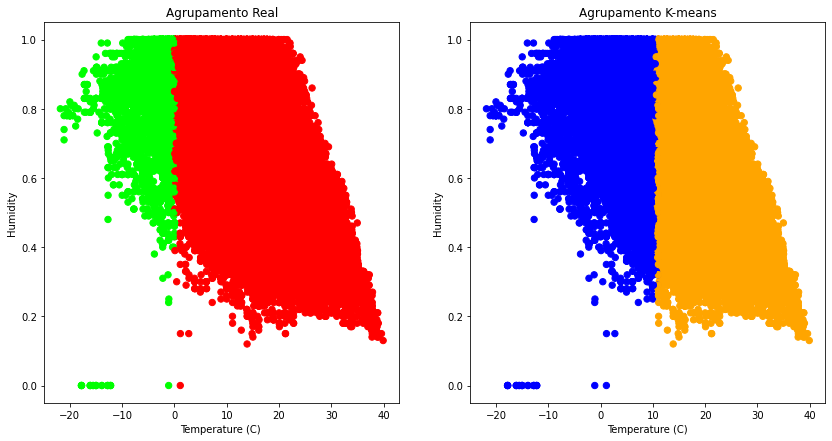

In [35]:
plt.figure(figsize=(14,7))


colormap_group = np.array(['blue','orange','green'])
colormap_real = np.array(['red','lime','black'])

#Agrupamentos Originais/Reais
plt.subplot(1,2,1)
plt.scatter(x=df[u'Temperature (C)'], y=df[u'Humidity'], c=colormap_real[df[u'Precip Type']], s=40)
plt.title("Agrupamento Real")
plt.xlabel("Temperature (C) ")
plt.ylabel("Humidity")


plt.subplot(1,2,2)
plt.scatter(x=df[u'Temperature (C)'], y=df[u'Humidity'], c=colormap_group[k_means.labels_], s=40)
plt.title("Agrupamento K-means")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")

<h2> Faça testes com diferentes atributos para verificar se existem sub-conjuntos de atributos mais
adequados para agrupar esses dados. Utilize o cálculo da silhueta para verificar a qualidade dos
grupos obtidos .
É possível observar que o coeficiente de silhueta está associado a um melhor agrupamento, ao se
comparar com os dados reais?

In [36]:
from sklearn import metrics


In [37]:
metrics.silhouette_score(df,k_means.labels_,metric='euclidean')

0.030122852233666272

In [39]:
k_means = cluster.KMeans(n_clusters=2)
preds = k_means.fit_predict(df[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']])
centers = k_means.cluster_centers_

score = metrics.silhouette_score(df,preds)
print(score)

0.8750404141279741


Text(0, 0.5, 'Humidity')

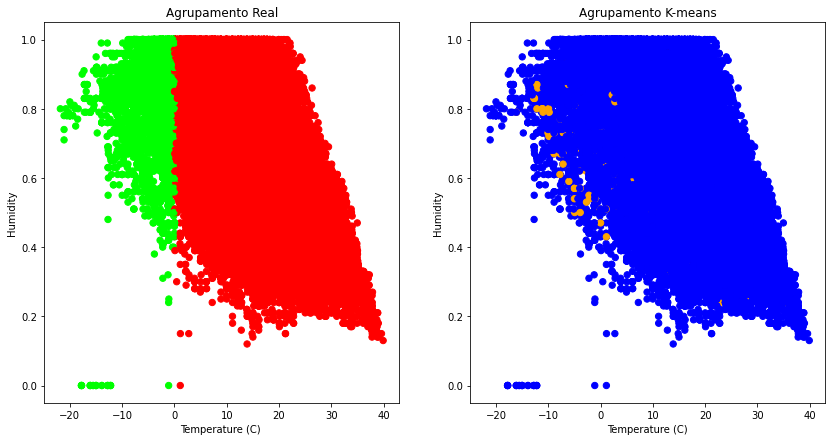

In [40]:
plt.figure(figsize=(14,7))


colormap_group = np.array(['blue','orange','green'])
colormap_real = np.array(['red','lime','black'])

#Agrupamentos Originais/Reais
plt.subplot(1,2,1)
plt.scatter(x=df[u'Temperature (C)'], y=df[u'Humidity'], c=colormap_real[df[u'Precip Type']], s=40)
plt.title("Agrupamento Real")
plt.xlabel("Temperature (C) ")
plt.ylabel("Humidity")


plt.subplot(1,2,2)
plt.scatter(x=df[u'Temperature (C)'], y=df[u'Humidity'], c=colormap_group[k_means.labels_], s=40)
plt.title("Agrupamento K-means")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")

In [41]:
k_means = cluster.KMeans(n_clusters=2)
preds = k_means.fit_predict(df[['Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)']])
centers = k_means.cluster_centers_

score = metrics.silhouette_score(df,preds)
print(score)

0.5346005727836705


Text(0, 0.5, 'Humidity')

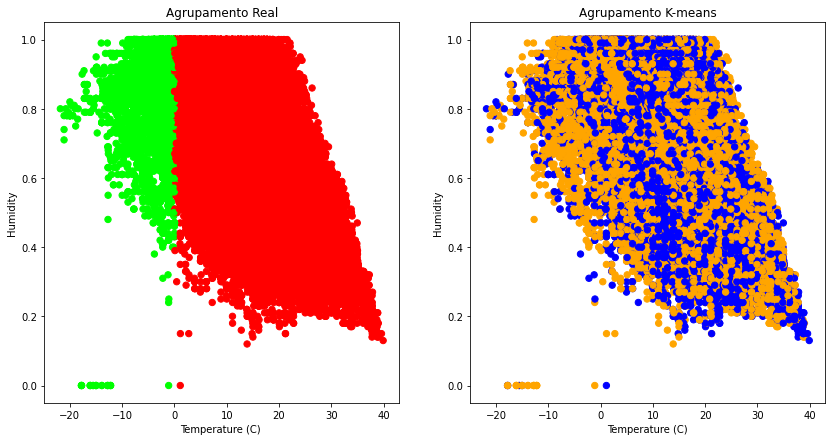

In [42]:
plt.figure(figsize=(14,7))


colormap_group = np.array(['blue','orange','green'])
colormap_real = np.array(['red','lime','black'])

#Agrupamentos Originais/Reais
plt.subplot(1,2,1)
plt.scatter(x=df[u'Temperature (C)'], y=df[u'Humidity'], c=colormap_real[df[u'Precip Type']], s=40)
plt.title("Agrupamento Real")
plt.xlabel("Temperature (C) ")
plt.ylabel("Humidity")


plt.subplot(1,2,2)
plt.scatter(x=df[u'Temperature (C)'], y=df[u'Humidity'], c=colormap_group[k_means.labels_], s=40)
plt.title("Agrupamento K-means")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")

<p> Os exemplos acima são o suficiente para provar que não necessariamente mais colunas vão trazer mais exatidão aos dados, as vezes é melhor identificar as colunas mais relevantes para fazer a agregação do que simplesmente tentar relacionar todas. Podemos ver também como o coeficiente de silhueta está associado a um melhor agrupamento